In [1]:
! pip3 install bs4


  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 122kB 409kB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored


In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
! pip3 install tabula-py


In [16]:
! pip3 install html5lib
! pip install HTMLParser

  Created wheel for HTMLParser: filename=HTMLParser-0.0.2-py3-none-any.whl size=5984 sha256=07c0ff2e7110c228feb1a69ca65dbc77cfaec26a841a3ba87db8046de08ed86a
  Stored in directory: /home/nobu/.cache/pip/wheels/88/0f/43/11747d95b28379b346c15f935f4d4075e7a4ec068d3a510c79
Successfully built HTMLParser


In [2]:
"""
Import Dietary reference intake info from
urls below into pandas df and make MongoDB DB
Recommended Dietary Allowances and Adequate Intakes
Must stay in bounds of upper limit for vitamins and minerals

"""
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request
import copy
import html5lib
import html.parser
import requests

url_elements = 'https://www.ncbi.nlm.nih.gov/books/NBK545442/table/appJ_tab3/?report=objectonly'
url_vitamins = 'https://www.ncbi.nlm.nih.gov/books/NBK56068/table/summarytables.t2/?report=objectonly'
url_macroNutrients = 'https://www.ncbi.nlm.nih.gov/books/NBK56068/table/summarytables.t4/?report=objectonly'
url_upper_vitamins = 'https://www.ncbi.nlm.nih.gov/books/NBK56068/table/summarytables.t7/?report=objectonly'
url_upper_elements = 'https://www.ncbi.nlm.nih.gov/books/NBK545442/table/appJ_tab9/?report=objectonly'
#url_macroNutrients_DistRange = "https://www.ncbi.nlm.nih.gov/books/NBK56068/table/summarytables.t5/?report=objectonly"

url_arr = [url_elements, url_vitamins, url_macroNutrients, url_upper_elements, url_upper_vitamins]
           #url_macroNutrients_DistRange

names_arr = ['elements', 'vitamins', 'macronutrients', 'elements upper', 'vitamins upper']#, 
            # 'macronutrients dist range']
df_dict = {}
df_arr = []
for url in url_arr:
    soup = BeautifulSoup(requests.get(url).content, 'html.parser')

    # remove <sup>
    for sup in soup.select('sup'):
        sup.extract()
    df = pd.read_html(str(soup))[0]
    df_arr.append(df)
    



In [3]:
# make copies so I don't have to download again in case of error
df_arr_copy = copy.deepcopy(df_arr)

In [67]:
# start by copying above copy here
df_arr = copy.deepcopy(df_arr_copy)

# macro dist-range not showin g range as on here: 
https://www.ncbi.nlm.nih.gov/books/NBK56068/table/summarytables.t5/?report=objectonly



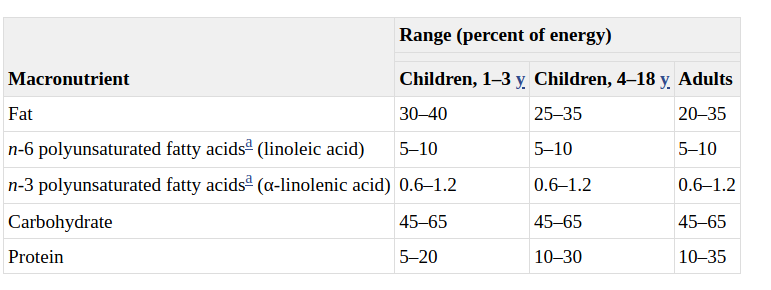

In [6]:
# add macro range
macro_range_df = pd.read_csv('rdi_csv/macronutrients_dist_range.csv')
print(macro_range_df)


  Life-Stage Group  Fat  Linoleic Acid  α-Linolenic Acid  Carbohydrate  \
0     child <= 3 y   30              5               0.6            45   
1    child <= 18 y   25              5               0.6            45   
2           adults   20              5               0.6            45   

   Protein  
0        5  
1       10  
2       10  


In [68]:
# zip the two arrs into dict

df_dict = dict(zip(names_arr, df_arr))
    
for k,v in df_dict.items():
    print(f"{k}\n {v}")

elements
    Life-Stage Group Calcium (mg/d) Chromium (μg/d) Copper (μg/d)  \
0           Infants        Infants         Infants       Infants   
1            0–6 mo           200*            0.2*          200*   
2           7–12 mo           260*            5.5*          220*   
3          Children       Children        Children      Children   
4             1–3 y            700             11*           340   
5             4–8 y           1000             15*           440   
6             Males          Males           Males         Males   
7            9–13 y           1300             25*           700   
8           14–18 y           1300             35*           890   
9           19–30 y           1000             35*           900   
10          31–50 y           1000             35*           900   
11          51–70 y           1000             30*           900   
12           > 70 y           1200             30*           900   
13          Females        Females    

In [9]:
df_dict['macronutrients dist range'] = macro_range_df

In [232]:
# change the col headers on macronutrients dist range

mac_distrange_df = df_dict['macronutrients dist range']
mac_distrange_df_copy = mac_distrange_df.copy
mac_distrange_df.columns = ['macronutrients as % energy', 'child 1-3 y', 'child 4-18 y', 'adults']

print(mac_distrange_df)
#rint(mac_distrange_df_copy.iloc[:,0])


                          macronutrients as % energy child 1-3 y child 4-18 y  \
0                                                Fat       30–40        25–35   
1    n-6 polyunsaturated fatty acids (linoleic acid)        5–10         5–10   
2  n-3 polyunsaturated fatty acids (α-linolenic a...     0.6–1.2      0.6–1.2   
3                                       Carbohydrate       45–65        45–65   
4                                            Protein        5–20        10–30   

    adults  
0    20–35  
1     5–10  
2  0.6–1.2  
3    45–65  
4    10–35  


In [233]:
'''
names_arr = ['elements', 'vitamins', 'macronutrients', 'elements upper', 'vitamins upper', 
             'macronutrients dist range']
'''


"\nnames_arr = ['elements', 'vitamins', 'macronutrients', 'elements upper', 'vitamins upper', \n             'macronutrients dist range']\n"

In [30]:
for k,v in df_dict.items():
    print(f"{v.dtypes}, {k}\n {v}")

Life-Stage Group     object
Calcium (mg/d)       object
Chromium (μg/d)      object
Copper (μg/d)        object
Fluoride (mg/d)      object
Iodine (μg/d)        object
Iron (mg/d)          object
Magnesium (mg/d)     object
Manganese (mg/d)     object
Molybdenum (μg/d)    object
Phosphorus (mg/d)    object
Selenium (μg/d)      object
Zinc (mg/d)          object
Potassium (mg/d)     object
Sodium (mg/d)        object
Chloride (g/d)       object
dtype: object, elements
    Life-Stage Group Calcium (mg/d) Chromium (μg/d) Copper (μg/d)  \
0           Infants        Infants         Infants       Infants   
1            0–6 mo           200*            0.2*          200*   
2           7–12 mo           260*            5.5*          220*   
3          Children       Children        Children      Children   
4             1–3 y            700             11*           340   
5             4–8 y           1000             15*           440   
6             Males          Males           Males 

### Above with Regex must replace (",", ""),
#### might need .value() or .item()
Also check dtype, cast to string, the cast back to float

In [69]:
#iterate each df field and if comma sep, replace
for name,df in df_dict.items():
    str_df = df.copy().astype(str)
    cols = list(df.columns)
    #print(f'cols[0]: {cols[0]}')
    
    # skip lifestage group col
    for i in range(1,len(cols)):
        str_df[cols[i]] = str_df[cols[i]].str.replace(',', '').str.replace('*','')


    df_dict[name] = str_df
            
            
                
            
            
            #print(df.loc[idx,col])

In [70]:
for name, df in df_dict.items():
    print(f'{name}\n{df}')

elements
   Life-Stage Group Calcium (mg/d) Chromium (μg/d) Copper (μg/d)  \
0           Infants        Infants         Infants       Infants   
1            0–6 mo            200             0.2           200   
2           7–12 mo            260             5.5           220   
3          Children       Children        Children      Children   
4             1–3 y            700              11           340   
5             4–8 y           1000              15           440   
6             Males          Males           Males         Males   
7            9–13 y           1300              25           700   
8           14–18 y           1300              35           890   
9           19–30 y           1000              35           900   
10          31–50 y           1000              35           900   
11          51–70 y           1000              30           900   
12           > 70 y           1200              30           900   
13          Females        Females     

In [11]:
# extract numbers
new_df_arr = []
for _,df in df_dict.items():
    df = df.astype(str)
    df_copy = df.copy()
    for i in range(1, len(df.columns)):
        df_copy[df.columns[i]]=df_copy[df.columns[i]].str.extract('(\d+[.]?\d*)', expand=False) #replace(r'[^0-9]+','')
    new_df_arr.append(df_copy)
# check df's
for df in new_df_arr:
    print(df)

# zip the two arrs into dict
df_dict = dict(zip(names_arr, new_df_arr))

   Life-Stage Group Calcium (mg/d) Chromium (μg/d) Copper (μg/d)  \
0           Infants            NaN             NaN           NaN   
1            0–6 mo            200             0.2           200   
2           7–12 mo            260             5.5           220   
3          Children            NaN             NaN           NaN   
4             1–3 y            700              11           340   
5             4–8 y           1000              15           440   
6             Males            NaN             NaN           NaN   
7            9–13 y           1300              25           700   
8           14–18 y           1300              35           890   
9           19–30 y           1000              35           900   
10          31–50 y           1000              35           900   
11          51–70 y           1000              30           900   
12           > 70 y           1200              30           900   
13          Females            NaN             N

In [71]:
# replace the Life StageGroup Column with new column to get rid of em dash
# up to that age easier later
lifestage_dict = {'Life-Stage Group': ['Infants', '< 6 mo', '< 12 mo',
                                       'Children', '1 to 3 y', '4 to 8 y',
                                    'Males', '9 to 13 y', '14 to 18 y', '19 to 30 y',
                                       '31 to 50 y', '51 to 70', '> 70 y',
                                       'Females', '9 to 13 y', '14 to 18 y', '19 to 30 y',
                                      '31 to 50 y', '51 to 70 y', '> 70 y',
                                       'Pregnancy', '14 to 18 y', '19 to 30 y',
                                       '31 to 50 y',
                                       'Lacation', '14 to 18 y', '19 to 30 y',
                                       '31 to 50 y']}


new_col_df = pd.DataFrame(lifestage_dict) 
print(new_col_df)

   Life-Stage Group
0           Infants
1            < 6 mo
2           < 12 mo
3          Children
4          1 to 3 y
5          4 to 8 y
6             Males
7         9 to 13 y
8        14 to 18 y
9        19 to 30 y
10       31 to 50 y
11         51 to 70
12           > 70 y
13          Females
14        9 to 13 y
15       14 to 18 y
16       19 to 30 y
17       31 to 50 y
18       51 to 70 y
19           > 70 y
20        Pregnancy
21       14 to 18 y
22       19 to 30 y
23       31 to 50 y
24         Lacation
25       14 to 18 y
26       19 to 30 y
27       31 to 50 y


In [72]:
'''
names_arr = ['elements', 'vitamins', 'macronutrients', 'elements upper', 'vitamins upper', 
             'macronutrients dist range']
'''

# iteratively change all except last
for name,df in df_dict.items():
    if name!='macronutrients dist range':
        if name=='elements' or name=='elements upper':
            df['Life-Stage Group'] = new_col_df['Life-Stage Group']
        else:
            df['Life StageGroup'] = new_col_df['Life-Stage Group']
        

for k,v in df_dict.items():
    print(f"{k}\n {v}\n")

elements
    Life-Stage Group Calcium (mg/d) Chromium (μg/d) Copper (μg/d)  \
0           Infants        Infants         Infants       Infants   
1            < 6 mo            200             0.2           200   
2           < 12 mo            260             5.5           220   
3          Children       Children        Children      Children   
4          1 to 3 y            700              11           340   
5          4 to 8 y           1000              15           440   
6             Males          Males           Males         Males   
7         9 to 13 y           1300              25           700   
8        14 to 18 y           1300              35           890   
9        19 to 30 y           1000              35           900   
10       31 to 50 y           1000              35           900   
11         51 to 70           1000              30           900   
12           > 70 y           1200              30           900   
13          Females        Females    

In [238]:
#https://pythonforundergradengineers.com/unicode-characters-in-python.html
print('\u03B1')
print(df_dict['vitamins'].columns)
print(df_dict['vitamins upper'].columns)

α
Index(['Life StageGroup', 'Vitamin A(μg/d)', 'Vitamin C(mg/d)',
       'Vitamin D(μg/d)', 'Vitamin E(mg/d)', 'Vitamin K(μg/d)',
       'Thiamin(mg/d)', 'Riboflavin(mg/d)', 'Niacin(mg/d)', 'Vitamin B6(mg/d)',
       'Folate(μg/d)', 'Vitamin B12(μg/d)', 'Pantothenic Acid(mg/d)',
       'Biotin(μg/d)', 'Choline(mg/d)'],
      dtype='object')
Index(['Life StageGroup', 'Vitamin A(μg/d)', 'Vitamin C(mg/d)',
       'Vitamin D(μg/d)', 'Vitamin E(mg/d)', 'Vitamin K', 'Thiamin',
       'Riboflavin', 'Niacin(mg/d)', 'Vitamin B6(mg/d)', 'Folate(μg/d)',
       'Vitamin B12', 'Pantothenic Acid', 'Biotin', 'Choline(g/d)',
       'Carotenoids'],
      dtype='object')


In [14]:
for k,v in df_dict.items():
    print(f"{k}\n {v}\n")

elements
    Life-Stage Group Calcium (mg/d) Chromium (μg/d) Copper (μg/d)  \
0           Infants            NaN             NaN           NaN   
1            < 6 mo            200             0.2           200   
2           < 12 mo            260             5.5           220   
3          Children            NaN             NaN           NaN   
4          1 to 3 y            700              11           340   
5          4 to 8 y           1000              15           440   
6             Males            NaN             NaN           NaN   
7         9 to 13 y           1300              25           700   
8        14 to 18 y           1300              35           890   
9        19 to 30 y           1000              35           900   
10       31 to 50 y           1000              35           900   
11         51 to 70           1000              30           900   
12           > 70 y           1200              30           900   
13          Females            NaN    

In [73]:
# edit col names and use "u" not micro symbol
for name,df in df_dict.items():
    if name=='vitamins': 
        df['Life StageGroup'] = new_col_df['Life-Stage Group']
        # change column names
        df.columns = ['Life-Stage Group', 'Vitamin A (ug/d)', 
                      'Vitamin C (mg/d)', 'Vitamin D (ug/d)',
                     'Vitamin E (mg/d)', 'Vitamin K (ug/d)', 
                      'Thiamin (mg/d)', 'Riboflavin (mg/d)', 'Niacin (mg/d)',
                     'Vitamin B6 (mg/d)', 'Folate (ug/d)', 'Vitamin B12 (ug/d)',
                     'Pantothenic Acid (mg/d)', 'Biotin (ug/d)', 'Choline (mg/d)']
    elif name=='vitamins upper':
        # change column names
        df.columns = ['Life-Stage Group', 'Vitamin A (ug/d)', 
                      'Vitamin C (mg/d)', 'Vitamin D (ug/d)',
                     'Vitamin E (mg/d)', 'Vitamin K (ug/d)', 
                      'Thiamin (mg/d)', 'Riboflavin (mg/d)', 'Niacin (mg/d)',
                     'Vitamin B6 (mg/d)', 'Folate (ug/d)', 'Vitamin B12 (ug/d)',
                     'Pantothenic Acid (mg/d)', 'Biotin (ug/d)', 'Choline (mg/d)',
                     'Carotenoids']
    elif name=='macronutrients':
        df.columns = ['Life-Stage Group', 'Total Water (L/d)', 'Carbohydrates (g/d)',
                     'Total Fiber (g/d)', 'Fat (g/d)', 'Linoleic Acid (g/d)', 
                     'alpha-Linolenic Acid (g/d)', 'Protein (g/d)']
for k,v in df_dict.items():
    print(f"{k}\n {v}\n")


elements
    Life-Stage Group Calcium (mg/d) Chromium (μg/d) Copper (μg/d)  \
0           Infants        Infants         Infants       Infants   
1            < 6 mo            200             0.2           200   
2           < 12 mo            260             5.5           220   
3          Children       Children        Children      Children   
4          1 to 3 y            700              11           340   
5          4 to 8 y           1000              15           440   
6             Males          Males           Males         Males   
7         9 to 13 y           1300              25           700   
8        14 to 18 y           1300              35           890   
9        19 to 30 y           1000              35           900   
10       31 to 50 y           1000              35           900   
11         51 to 70           1000              30           900   
12           > 70 y           1200              30           900   
13          Females        Females    

In [74]:
#change col names for elements and elements upper
elements_cols = [x.replace("\u03BC", "u") for x in df_dict['elements'].columns.tolist()]
print(elements_cols)
elements_upper_cols = [x.replace("\u03BC", "u") for x in df_dict['elements upper'].columns.tolist()]
df_dict['elements'].columns = elements_cols
df_dict['elements upper'].columns = elements_upper_cols

for k,v in df_dict.items():
    print(f"{k}\n {v}\n")


['Life-Stage Group', 'Calcium (mg/d)', 'Chromium (ug/d)', 'Copper (ug/d)', 'Fluoride (mg/d)', 'Iodine (ug/d)', 'Iron (mg/d)', 'Magnesium (mg/d)', 'Manganese (mg/d)', 'Molybdenum (ug/d)', 'Phosphorus (mg/d)', 'Selenium (ug/d)', 'Zinc (mg/d)', 'Potassium (mg/d)', 'Sodium (mg/d)', 'Chloride (g/d)']
elements
    Life-Stage Group Calcium (mg/d) Chromium (ug/d) Copper (ug/d)  \
0           Infants        Infants         Infants       Infants   
1            < 6 mo            200             0.2           200   
2           < 12 mo            260             5.5           220   
3          Children       Children        Children      Children   
4          1 to 3 y            700              11           340   
5          4 to 8 y           1000              15           440   
6             Males          Males           Males         Males   
7         9 to 13 y           1300              25           700   
8        14 to 18 y           1300              35           890   
9        19 t

In [76]:
df_dict['vitamins'].columns.tolist()

['Life-Stage Group',
 'Vitamin A (ug/d)',
 'Vitamin C (mg/d)',
 'Vitamin D (ug/d)',
 'Vitamin E (mg/d)',
 'Vitamin K (ug/d)',
 'Thiamin (mg/d)',
 'Riboflavin (mg/d)',
 'Niacin (mg/d)',
 'Vitamin B6 (mg/d)',
 'Folate (ug/d)',
 'Vitamin B12 (ug/d)',
 'Pantothenic Acid (mg/d)',
 'Biotin (ug/d)',
 'Choline (mg/d)',
 'Life StageGroup']

In [75]:
# seems buggy so change again 
# delete cartoenoid from vitamins upper
#vitamins_upper = df_dict['vitamins upper']
#del vitamins_upper['Carotenoids']

for name,df in df_dict.items():
    if name=='vitamins': 
        df['Life StageGroup'] = new_col_df['Life-Stage Group']
        # change column names
        df.columns = ['Life-Stage Group', 'Vitamin A (ug/d)', 
                      'Vitamin C (mg/d)', 'Vitamin D (ug/d)',
                     'Vitamin E (mg/d)', 'Vitamin K (ug/d)', 
                      'Thiamin (mg/d)', 'Riboflavin (mg/d)', 'Niacin (mg/d)',
                     'Vitamin B6 (mg/d)', 'Folate (ug/d)', 'Vitamin B12 (ug/d)',
                     'Pantothenic Acid (mg/d)', 'Biotin (ug/d)', 'Choline (mg/d)']
    elif name=='vitamins upper':
        # change column names
        df.columns = ['Life-Stage Group', 'Vitamin A (ug/d)', 
                      'Vitamin C (mg/d)', 'Vitamin D (ug/d)',
                     'Vitamin E (mg/d)', 'Vitamin K (ug/d)', 
                      'Thiamin (mg/d)', 'Riboflavin (mg/d)', 'Niacin (mg/d)',
                     'Vitamin B6 (mg/d)', 'Folate (ug/d)', 'Vitamin B12 (ug/d)',
                     'Pantothenic Acid (mg/d)', 'Biotin (ug/d)', 'Choline (mg/d)',
                     'Carotenoids']
    elif name=='macronutrients':
        df.columns = ['Life-Stage Group', 'Total Water (L/d)', 'Carbohydrates (g/d)',
                     'Total Fiber (g/d)', 'Fat (g/d)', 'Linoleic Acid (g/d)', 
                     '\u03B1-Linolenic Acid (g/d)', 'Protein (g/d)']
for k,v in df_dict.items():
    print(f"{k}\n {v}\n")


ValueError: Length mismatch: Expected axis has 16 elements, new values have 15 elements

In [79]:

# delete extra column 
for name, df in df_dict.items():
    cols = list(df.columns)
    if 'Life StageGroup' in cols:
        del df['Life StageGroup']


for k,v in df_dict.items():
    print(f"{k}\n {v}\n")


elements
    Life-Stage Group Calcium (mg/d) Chromium (ug/d) Copper (ug/d)  \
0           Infants        Infants         Infants       Infants   
1            < 6 mo            200             0.2           200   
2           < 12 mo            260             5.5           220   
3          Children       Children        Children      Children   
4          1 to 3 y            700              11           340   
5          4 to 8 y           1000              15           440   
6             Males          Males           Males         Males   
7         9 to 13 y           1300              25           700   
8        14 to 18 y           1300              35           890   
9        19 to 30 y           1000              35           900   
10       31 to 50 y           1000              35           900   
11         51 to 70           1000              30           900   
12           > 70 y           1200              30           900   
13          Females        Females    

In [242]:
#append units to cells
for _,df in df_dict.items():
    for col in df.columns:
        if col != 'Life-Stage Group':
            if 'mg' in col:
                df[col] = df[col].astype(str) + ' mg'
            elif '\u03BC' in col:
                df[col] = df[col].astype(str) + ' \u03BCg'
            elif 'L/d' in col:
                df[col] = df[col].astype(str) + ' L'
            else: # 'g'
                df[col] = df[col].astype(str) + ' g'

for k,v in df_dict.items():
    print(f"{k}\n {v}\n")    

elements
    Life-Stage Group Calcium (mg/d) Chromium (μg/d) Copper (μg/d)  \
0           Infants         nan mg          nan μg        nan μg   
1          <= 0.5 y         200 mg          0.2 μg        200 μg   
2          <= 1.0 y         260 mg          5.5 μg        220 μg   
3          Children         nan mg          nan μg        nan μg   
4          <= 3.0 y         700 mg           11 μg        340 μg   
5          <= 8.0 y        1000 mg           15 μg        440 μg   
6             Males         nan mg          nan μg        nan μg   
7         <= 13.0 y        1300 mg           25 μg        700 μg   
8         <= 18.0 y        1300 mg           35 μg        890 μg   
9         <= 30.0 y        1000 mg           35 μg        900 μg   
10        <= 50.0 y        1000 mg           35 μg        900 μg   
11        <= 70.0 y        1000 mg           30 μg        900 μg   
12         > 70.0 y        1200 mg           30 μg        900 μg   
13          Females         nan mg    

In [228]:
print('epsilon: \u03B5')
print('mu: \u03BC')



epsilon: ε
mu: μ


In [80]:
my_df_dict = copy.deepcopy(df_dict)
#path = 'csvThanksgiving/'
# concatenate
'''
names_arr = ['elements', 'vitamins', 'macronutrients', 'elements upper', 'vitamins upper', 
             'macronutrients dist range']
'''
elements_df = my_df_dict['elements']
vitamins_df = my_df_dict['vitamins']
macronutrients_df = my_df_dict['macronutrients']
upper_elements_df = my_df_dict['elements upper']
upper_vitamins_df = my_df_dict['vitamins upper']
#macronutrients_distrange_df = my_df_dict['macronutrients dist range']

elements_df.to_csv("elements_rdi.csv", index=False)
vitamins_df.to_csv("vitamins_rdi.csv", index=False)
macronutrients_df.to_csv("macronutrients_rdi.csv", index=False)
upper_elements_df.to_csv("elements_upper_rdi.csv", index=False)
upper_vitamins_df.to_csv("vitamins_upper_rdi.csv", index=False)
#macronutrients_distrange_df.to_csv("macronutrients_dist_range.csv", index=False)




In [244]:
#elements divided by rows, skip header rows
infants_elements = elements_df.iloc[1:3, :]
children_elements = elements_df.iloc[4:6, :]
males_elements = elements_df.iloc[7:13, :]
females_elements = elements_df.iloc[14:20, :]
pregnancy_elements = elements_df.iloc[21:24, :]
lactation_elements = elements_df.iloc[25:, :]
# same rows as elements, don't skip lifestage col
infants_vitamins = vitamins_df.iloc[1:3, :]
children_vitamins = vitamins_df.iloc[4:6, :]
males_vitamins = vitamins_df.iloc[7:13, :]
females_vitamins = vitamins_df.iloc[14:20, :]
pregnancy_vitamins = vitamins_df.iloc[21:24, :]
lactation_vitamins = vitamins_df.iloc[25:, :]
#macro same, 28 * 8, skip lifestage col
infants_macronutrients = macronutrients_df.iloc[1:3, :]
children_macronutrients = macronutrients_df.iloc[4:6, :]
males_macronutrients = macronutrients_df.iloc[7:13, :]
females_macronutrients = macronutrients_df.iloc[14:20, :]
pregnancy_macronutrients = macronutrients_df.iloc[21:24, :]
lactaction_macronutrients = macronutrients_df.iloc[25:, :]

# upper_minerals, 28 * 22
infants_upper_elements = upper_elements_df.iloc[1:3, :]
children_upper_elements = upper_elements_df.iloc[4:6, :]
males_upper_elements = upper_elements_df.iloc[7:13, :]
females_upper_elements = upper_elements_df.iloc[14:20, :]
pregnancy_upper_elements = upper_elements_df.iloc[21:24, :]
lactation_upper_elements = upper_elements_df.iloc[25:, :]

#upper_vitamins same 28 *16, skip lifestage col
infants_upper_vitamins = upper_vitamins_df.iloc[1:3, 1:]
children_upper_vitamins = upper_vitamins_df.iloc[4:6, 1:]
males_upper_vitamins = upper_vitamins_df.iloc[7:13, 1:]
females_upper_vitamins = upper_vitamins_df.iloc[14:20, 1:]
pregnancy_upper_vitamins = upper_vitamins_df.iloc[21:24, 1:]
lactation_upper_vitamins = upper_vitamins_df.iloc[25:, 1:]

In [245]:
'''
#concat on axis 1
infants_micro_rdi = pd.concat([infant_elements, infant_vitamins], axis=1, sort=False)
children_rdi = pd.concat([child_elements, child_vitamins], axis=1, sort=False)
males_rdi = pd.concat([male_elements, male_vitamins], axis=1, sort=False)
females_rdi = pd.concat([female_elements, female_vitamins], axis=1, sort=False)
pregnancy_rdi = pd.concat([preg_elements, preg_vitamins], axis=1, sort=False)
lactation_rdi = pd.concat([lact_elements, lact_vitamins], axis=1, sort=False)


# concat upper ranges
infants_upper_micro = pd.concat([infant_upper_elements, infant_upper_vitamins], axis=1, sort=False)
children_upper_micro = pd.concat([child_upper_elements, child_upper_vitamins], axis=1, sort=False)
males_upper_micro = pd.concat([male_upper_elements, male_upper_vitamins], axis=1, sort=False)
females_upper_micro = pd.concat([female_upper_elements, female_upper_vitamins], axis=1, sort=False)
preg_upper_micro = pd.concat([preg_upper_elements, preg_upper_vitamins], axis=1, sort=False)
lact_upper_micro = pd.concat([lact_upper_elements, lact_upper_vitamins], axis=1, sort=False)

# yank out u4, u18 and adults
#macronutrients_distrange_df.columns = ['macronutrients as % energy', 'child 1-3 y', 'child 4-18 y', 'adults']
u4_macro_range = macronutrients_distrange_df[['macronutrients as % energy', 'child 1-3 y']].copy()
u18_macro_range = macronutrients_distrange_df[['macronutrients as % energy', 'child 4-18 y']].copy()
adults_macro_range = macronutrients_distrange_df[['macronutrients as % energy', 'adults']].copy()
'''

In [246]:
infants_elements.to_csv("infants_elements.csv", index=False)
infants_vitamins.to_csv("infants_vitamins.csv", index=False)
infants_macronutrients.to_csv("infants_macronutrients.csv", index=False)
infants_upper_elements.to_csv("infants_upper_elements.csv", index=False)
infants_upper_vitamins.to_csv("infants_upper_vitamins.csv", index=False)

children_elements.to_csv("children_elements.csv", index=False)
children_vitamins.to_csv("children_vitamins.csv", index=False)
children_macronutrients.to_csv("children_macronutrients.csv", index=False)
children_upper_elements.to_csv("children_upper_elements.csv", index=False)
children_upper_vitamins.to_csv("children_upper_vitamins.csv", index=False)

males_elements.to_csv("males_elements.csv", index=False)
males_vitamins.to_csv("males_vitamins.csv", index=False)
males_macronutrients.to_csv("males_macronutrients.csv", index=False)
males_upper_elements.to_csv("males_upper_elements.csv", index=False)
males_upper_vitamins.to_csv("males_upper_vitamins.csv", index=False)

females_elements.to_csv("females_elements.csv", index=False)
females_vitamins.to_csv("females_vitamins.csv", index=False)
females_macronutrients.to_csv("females_macronutrients.csv", index=False)
females_upper_elements.to_csv("females_upper_elements.csv", index=False)
females_upper_vitamins.to_csv("females_upper_vitmains.csv", index=False)

pregnancy_elements.to_csv("pregnancy_elements.csv", index=False)
pregnancy_vitamins.to_csv("pregnancy_vitamins.csv", index=False)
pregnancy_macronutrients.to_csv("pregnancy_macronutrients.csv", index=False)
pregnancy_upper_elements.to_csv("pregnancy_upper_elements.csv", index=False)
pregnancy_upper_vitamins.to_csv("pregnancy_upper_vitamins.csv", index=False)

lactation_elements.to_csv("lactation_elements.csv", index=False)
lactation_vitamins.to_csv(path+"lactation_vitamins.csv", index=False)
lactation_macronutrients.to_csv("lactation_macronutrients.csv", index=False)
lactation_upper_elements.to_csv("lactation_upper_elements.csv", index=False)
lactation_upper_vitamins.to_csv("lactation_upper_vitamins.csv", index=False)

'''
# concatenated upper elem, vit
infants_upper_micro.to_csv(path+"infants_upper_micro.csv", index=False)
children_upper_micro.to_csv(path+"children_upper_micro.csv", index=False)
males_upper_micro.to_csv(path+"males_upper_micro.csv", index=False)
females_upper_micro.to_csv(path+"females_upper_micro.csv", index=False)
preg_upper_micro.to_csv(path+"preg_upper_micro.csv", index=False)
lact_upper_micro.to_csv(path+"lact_upper_micro.csv", index=False)

#u4_macro_range.to_csv(path+"u4_macro_range.csv", index=False)
#u18_macro_range.to_csv(path+"u18_macro_range.csv", index=False)
#adults_macro_range.to_csv(path+"adults_macro_range.csv", index=False)
'''




In [2]:
'''
macronutrients dist range
                           macronutrients as % energy child 1-3 y child 4-18 y  \
0                                              Fat g        30 g         25 g   
1  n-6 polyunsaturated fatty acids (linoleic acid) g         5 g          5 g   
2  n-3 polyunsaturated fatty acids (α-linolenic a...       0.6 g        0.6 g   
3                                     Carbohydrate g        45 g         45 g   
4                                          Protein g         5 g         10 g   

  adults  
0   20 g  
1    5 g  
2  0.6 g  
3   45 g  
4   10 g  


'''
import pandas as pd
cols_arr = ['Life-Stage Group','Fat', 'Linoleic Acid', '\u03B1-Linolenic Acid', 'Carbohydrate', 'Protein']
macro_distrange_dict = {
    'Life-Stage Group': ['child <= 3 y', 'child <= 18 y', 'adults'],
    'Fat':['30 %', '25 %', '20 %'],
    'Linoleic Acid':['5 %', '5 %', '5 %'],
    '\u03B1-Linolenic Acid': ['0.6 %', '0.6 %', '0.6 %'],
    'Carbohydrate': ['45 %', '45 %', '45 %'],
    'Protein': ['5 %', '10 %', '10 %']
}

macro_distrange_df = pd.DataFrame(macro_distrange_dict)

print(macro_distrange_df)

  Life-Stage Group   Fat Linoleic Acid α-Linolenic Acid Carbohydrate Protein
0     child <= 3 y  30 %           5 %            0.6 %         45 %     5 %
1    child <= 18 y  25 %           5 %            0.6 %         45 %    10 %
2           adults  20 %           5 %            0.6 %         45 %    10 %


In [3]:
# write to csv
macro_distrange_df.to_csv(path"all_macro_range.csv", index=False)

NameError: name 'path' is not defined

In [ ]:
df = pd.DataFrame({'Life-Stage Group': {0: '<= 3.0 y', 1: '<= 8.0 y'},
 'Arsenic': {0: 'nan g', 1: 'nan g'},
 'Boron (mg/d)': {0: '3 mg', 1: '6 mg'},
 'Calcium (mg/d)': {0: '2500 mg', 1: '2500 mg'},
 'Chromium': {0: 'nan g', 1: 'nan g'},
 'Copper (μg/d)': {0: '1000 μg', 1: '3000 μg'}})

print(df)

In [13]:
#######################start here
import os
import pandas as pd

files_arr = os.listdir()
files_arr

['nutrientsRDICleanUp.ipynb',
 'males_macronutrients.csv',
 'infants_upper_elements.csv',
 'children_upper_vitamins.csv',
 'pregnancy_macronutrients.csv',
 'infants_vitamins.csv',
 'infants_macronutrients.csv',
 'children_elements.csv',
 'females_vitamins.csv',
 'females_upper_vitmains.csv',
 'pregnancy_elements.csv',
 'lactation_vitamins.csv',
 'males_elements.csv',
 'infants_elements.csv',
 'lactation_upper_elements.csv',
 'males_upper_elements.csv',
 'pregnancy_upper_vitamins.csv',
 'lactation_macronutrients.csv',
 '.ipynb_checkpoints',
 'all_macro_range.csv',
 'females_macronutrients.csv',
 'females_elements.csv',
 'males_upper_vitamins.csv',
 'lactation_elements.csv',
 'pregnancy_vitamins.csv',
 'children_vitamins.csv',
 'children_upper_elements.csv',
 'females_upper_elements.csv',
 'lactation_upper_vitamins.csv',
 'males_vitamins.csv',
 'children_macronutrients.csv',
 'pregnancy_upper_elements.csv',
 'nutrientsRDInew.ipynb',
 'infants_upper_vitamins.csv']

In [39]:
#upper_vitamins missing 'Life-Stage Group' column
'''
upper_files_arr = [x for x in files_arr if "upper_vitamins" in os.path.splitext(x)[0]]
print(upper_files_arr)
names_arr = upper_files_arr[:]
df_arr=[]
for file in upper_files_arr:
    df = pd.read_csv(file)
    df_arr.append(df)
'''

files_dict = {}
dfname=''
for file in files_arr:
    if "upper_vitamins" in os.path.splitext(file)[0] or \
        "upper_vitmains" in os.path.splitext(file)[0]:
        dfname=os.path.splitext(file)[0]
        df = pd.read_csv(file)
        files_dict[dfname]=df
        print(f'{dfname}\n{df}')




children_upper_vitamins
  Vitamin A (μg/d) Vitamin C (mg/d) Vitamin D (μg/d) Vitamin E (mg/d)  \
0         600.0 μg           400 mg          63.0 μg           200 mg   
1         900.0 μg           650 mg          75.0 μg           300 mg   

  Vitamin K (μg/d) Thiamin (mg/d) Riboflavin (mg/d) Niacin (mg/d)  \
0           nan μg         nan mg            nan mg         10 mg   
1           nan μg         nan mg            nan mg         15 mg   

  Vitamin B6 (mg/d) Folate (μg/d) Vitamin B12 (μg/d) Pantothenic Acid (mg/d)  \
0             30 mg        300 μg             nan μg                  nan mg   
1             40 mg        400 μg             nan μg                  nan mg   

  Biotin (μg/d) Choline (mg/d) Carotenoids  
0        nan μg         1.0 mg       nan g  
1        nan μg         1.0 mg       nan g  
females_upper_vitmains
  Vitamin A (μg/d) Vitamin C (mg/d) Vitamin D (μg/d) Vitamin E (mg/d)  \
0        1700.0 μg          1200 mg         100.0 μg           600 mg   
1  

In [40]:

lifestage_dict = {'Life-Stage Group': ['Infants', '<= 0.5 y', '<= 1.0 y',
                                   'Children', '<= 3.0 y', '<= 8.0 y',
                                'Males', '<= 13.0 y', '<= 18.0 y', '<= 30.0 y',
                                  '<= 50.0 y', '<= 70.0 y', '> 70.0 y',
                                   'Females', '<= 13.0 y', '<= 18.0 y', '<= 30.0 y',
                                  '<= 50.0 y', '<= 70.0 y', '> 70.0 y',
                                   'Pregnancy', '<= 18.0 y', '<= 30.0 y',
                                   '<= 50.0 y',
                                   'Lacation', '<= 18.0 y', '<= 30.0 y',
                                   '<= 50.0 y']}
child_cols = ['<= 3.0 y', '<= 8.0 y']
infant_cols = ['<= 0.5 y', '<= 1.0 y']
male_cols =['<= 13.0 y', '<= 18.0 y', '<= 30.0 y',
            '<= 50.0 y', '<= 70.0 y', '> 70.0 y',]
female_cols=['<= 13.0 y', '<= 18.0 y', '<= 30.0 y',
            '<= 50.0 y', '<= 70.0 y', '> 70.0 y',]
pregnancy_cols=['<= 18.0 y', '<= 30.0 y','<= 50.0 y']
lactation_cols=['<= 18.0 y', '<= 30.0 y','<= 50.0 y']

col_name = 'Life-Stage Group'
#add col
idx=0
for df_name, df in files_dict.items():
    if df_name=='children_upper_vitamins':
        df.insert(loc=idx, column=col_name, value=child_cols)
    elif df_name=='infants_upper_vitamins':
        df.insert(loc=idx, column=col_name, value=infant_cols)
    elif df_name=='females_upper_vitmains':
        df.insert(loc=idx, column=col_name, value=female_cols)
    elif df_name=='males_upper_vitamins':
        df.insert(loc=idx, column=col_name, value=male_cols)
    
    elif df_name=='pregnancy_upper_vitamins':
        df.insert(loc=idx, column=col_name, value=pregnancy_cols)
    elif df_name=='lactation_upper_vitamins':
        df.insert(loc=idx, column=col_name, value=lactation_cols)



for name, df in files_dict.items():
    print(f'{name}\n{df}')
        


children_upper_vitamins
  Life-Stage Group Vitamin A (μg/d) Vitamin C (mg/d) Vitamin D (μg/d)  \
0         <= 3.0 y         600.0 μg           400 mg          63.0 μg   
1         <= 8.0 y         900.0 μg           650 mg          75.0 μg   

  Vitamin E (mg/d) Vitamin K (μg/d) Thiamin (mg/d) Riboflavin (mg/d)  \
0           200 mg           nan μg         nan mg            nan mg   
1           300 mg           nan μg         nan mg            nan mg   

  Niacin (mg/d) Vitamin B6 (mg/d) Folate (μg/d) Vitamin B12 (μg/d)  \
0         10 mg             30 mg        300 μg             nan μg   
1         15 mg             40 mg        400 μg             nan μg   

  Pantothenic Acid (mg/d) Biotin (μg/d) Choline (mg/d) Carotenoids  
0                  nan mg        nan μg         1.0 mg       nan g  
1                  nan mg        nan μg         1.0 mg       nan g  
females_upper_vitmains
  Life-Stage Group Vitamin A (μg/d) Vitamin C (mg/d) Vitamin D (μg/d)  \
0        <= 13.0 y       

In [24]:
for name, df in files_dict.items():
    print(f'{name}\n{df}')
    

children_upper_vitamins
  Vitamin A (μg/d) Vitamin C (mg/d) Vitamin D (μg/d) Vitamin E (mg/d)  \
0         600.0 μg           400 mg          63.0 μg           200 mg   
1         900.0 μg           650 mg          75.0 μg           300 mg   

  Vitamin K (μg/d) Thiamin (mg/d) Riboflavin (mg/d) Niacin (mg/d)  \
0           nan μg         nan mg            nan mg         10 mg   
1           nan μg         nan mg            nan mg         15 mg   

  Vitamin B6 (mg/d) Folate (μg/d) Vitamin B12 (μg/d) Pantothenic Acid (mg/d)  \
0             30 mg        300 μg             nan μg                  nan mg   
1             40 mg        400 μg             nan μg                  nan mg   

  Biotin (μg/d) Choline (mg/d) Carotenoids  
0        nan μg         1.0 mg       nan g  
1        nan μg         1.0 mg       nan g  
females_upper_vitmains
  Vitamin A (μg/d) Vitamin C (mg/d) Vitamin D (μg/d) Vitamin E (mg/d)  \
0        1700.0 μg          1200 mg         100.0 μg           600 mg   
1  

In [43]:
#write to csv files
for name, df in files_dict.items():
    fullname = name + '.csv'
    print(fullname)
    df.to_csv(fullname, index=False)

children_upper_vitamins.csv
females_upper_vitmains.csv
pregnancy_upper_vitamins.csv
males_upper_vitamins.csv
lactation_upper_vitamins.csv
infants_upper_vitamins.csv


In [7]:
#import df to work with
csv_file_arr = [x for x in files_arr if os.path.splitext(x)[1]=='.csv']
csv_file_arr.sort()
print(csv_file_arr)

['all_macro_range.csv', 'children_elements.csv', 'children_macronutrients.csv', 'children_upper_elements.csv', 'children_upper_vitamins.csv', 'children_vitamins.csv', 'females_elements.csv', 'females_macronutrients.csv', 'females_upper_elements.csv', 'females_upper_vitmains.csv', 'females_vitamins.csv', 'infants_elements.csv', 'infants_macronutrients.csv', 'infants_upper_elements.csv', 'infants_upper_vitamins.csv', 'infants_vitamins.csv', 'lactation_elements.csv', 'lactation_macronutrients.csv', 'lactation_upper_elements.csv', 'lactation_upper_vitamins.csv', 'lactation_vitamins.csv', 'males_elements.csv', 'males_macronutrients.csv', 'males_upper_elements.csv', 'males_upper_vitamins.csv', 'males_vitamins.csv', 'pregnancy_elements.csv', 'pregnancy_macronutrients.csv', 'pregnancy_upper_elements.csv', 'pregnancy_upper_vitamins.csv', 'pregnancy_vitamins.csv']


In [8]:
import pandas as pd
choice = 3
#import df and start working
df = pd.read_csv(csv_file_arr[choice])
print(df)

  Life-Stage Group Arsenic Boron (mg/d) Calcium (mg/d) Chromium Copper (μg/d)  \
0         <= 3.0 y   nan g         3 mg        2500 mg    nan g       1000 μg   
1         <= 8.0 y   nan g         6 mg        2500 mg    nan g       3000 μg   

  Fluoride (mg/d) Iodine (μg/d) Iron (mg/d) Magnesium (mg/d)  ...  \
0          1.3 mg        200 μg       40 mg            65 mg  ...   
1          2.2 mg        300 μg       40 mg           110 mg  ...   

  Nickel (mg/d) Phosphorus (g/d) Potassium Selenium (μg/d) Silicon Sulfate  \
0        0.2 mg              3 g     nan g           90 μg   nan g   nan g   
1        0.3 mg              3 g     nan g          150 μg   nan g   nan g   

  Vanadium (mg/d) Zinc (mg/d) Sodium Chloride (g/d)  
0          nan mg        7 mg  nan g          2.3 g  
1          nan mg       12 mg  nan g          2.9 g  

[2 rows x 22 columns]


In [9]:
# extract numbers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dfc = df.copy().astype(str)
for i in range(1, len(dfc.columns)):
    dfc[dfc.columns[i]]=dfc[dfc.columns[i]].str.extract('(\d+[.]?\d*)', expand=False) #replace(r'[^0-9]+','')
    if 'mg' in dfc.columns[i]:
        #val = pd.to_numeric(dfc[dfc.columns[i]], errors='coerce') * 1
        val = dfc[dfc.columns[i]].astype(float) * 1. 
        dfc[dfc.columns[i]] = val
    elif '\u03BCg' in dfc.columns[i]:
        #val = pd.to_numeric(dfc[dfc.columns[i]], errors='coerce') / 1000.
        val = dfc[dfc.columns[i]].astype(float) / 1000.
        dfc[dfc.columns[i]] = val
    elif 'g' in dfc.columns[i]:
        val = dfc[dfc.columns[i]].astype(float) * 1000.
        dfc[dfc.columns[i]] = val

#print(dfc)

# replace NaN in dfc[dfc.columns[i]]:

dfc.fillna(0, inplace=True)
#dfc = dfc.replace('NaN', 0)
print(dfc)
print(dfc.dtypes)

  Life-Stage Group  Arsenic  Boron (mg/d)  Calcium (mg/d)  Chromium  \
0         <= 3.0 y        0           3.0          2500.0         0   
1         <= 8.0 y        0           6.0          2500.0         0   

   Copper (μg/d)  Fluoride (mg/d)  Iodine (μg/d)  Iron (mg/d)  \
0            1.0              1.3            0.2         40.0   
1            3.0              2.2            0.3         40.0   

   Magnesium (mg/d)  Manganese (mg/d)  Molybdenum (μg/d)  Nickel (mg/d)  \
0              65.0               2.0                0.3            0.2   
1             110.0               3.0                0.6            0.3   

   Phosphorus (g/d)  Potassium  Selenium (μg/d)  Silicon  Sulfate  \
0            3000.0          0             0.09        0        0   
1            3000.0          0             0.15        0        0   

   Vanadium (mg/d)  Zinc (mg/d)  Sodium  Chloride (g/d)  
0              0.0          7.0       0          2300.0  
1              0.0         12.0       0 

In [10]:
# dataframe to dict by index
df_idx = dfc.set_index('Life-Stage Group', inplace=False)
print(df_idx)
df_dict_split = df_idx.to_dict(orient='split')
print(f'df_dict_split\n{df_dict_split}')
df_dict_idx = df_idx.to_dict(orient='index')
print(f'df_dict_idx\n{df_dict_idx}')

                  Arsenic  Boron (mg/d)  Calcium (mg/d)  Chromium  \
Life-Stage Group                                                    
<= 3.0 y                0           3.0          2500.0         0   
<= 8.0 y                0           6.0          2500.0         0   

                  Copper (μg/d)  Fluoride (mg/d)  Iodine (μg/d)  Iron (mg/d)  \
Life-Stage Group                                                               
<= 3.0 y                    1.0              1.3            0.2         40.0   
<= 8.0 y                    3.0              2.2            0.3         40.0   

                  Magnesium (mg/d)  Manganese (mg/d)  Molybdenum (μg/d)  \
Life-Stage Group                                                          
<= 3.0 y                      65.0               2.0                0.3   
<= 8.0 y                     110.0               3.0                0.6   

                  Nickel (mg/d)  Phosphorus (g/d)  Potassium  Selenium (μg/d)  \
Life-Stage Group    

In [13]:
#https://dev.to/fronkan/stacked-and-grouped-bar-charts-using-plotly-python-a4p
# make values lists, keys to list and zip for a dict of {key: list}
row_names, nutrient_names = [], []
values = []
#vals for each row, lifestage group
curr_vals = []
count = 0
for k,v in df_dict_idx.items():
    row_names.append(k)
    for nutrient_name, value in v.items():
        if count==0:
            nutrient_names.append(nutrient_name)
        curr_vals.append(value)
    values.append(curr_vals)
    curr_vals = []
    count+=1

print(f'row name: {row_names}\nnutrient names: {nutrient_names}\n, values: \
      {values}')

row name: ['<= 3.0 y', '<= 8.0 y']
nutrient names: ['Arsenic', 'Boron (mg/d)', 'Calcium (mg/d)', 'Chromium', 'Copper (μg/d)', 'Fluoride (mg/d)', 'Iodine (μg/d)', 'Iron (mg/d)', 'Magnesium (mg/d)', 'Manganese (mg/d)', 'Molybdenum (μg/d)', 'Nickel (mg/d)', 'Phosphorus (g/d)', 'Potassium', 'Selenium (μg/d)', 'Silicon', 'Sulfate', 'Vanadium (mg/d)', 'Zinc (mg/d)', 'Sodium', 'Chloride (g/d)']
, values:       [[0, 3.0, 2500.0, 0, 1.0, 1.3, 0.2, 40.0, 65.0, 2.0, 0.3, 0.2, 3000.0, 0, 0.09, 0, 0, 0.0, 7.0, 0, 2300.0], [0, 6.0, 2500.0, 0, 3.0, 2.2, 0.3, 40.0, 110.0, 3.0, 0.6, 0.3, 3000.0, 0, 0.15, 0, 0, 0.0, 12.0, 0, 2900.0]]


In [18]:
# merge dictionaries
#https://stackoverflow.com/questions/38987/how-do-i-merge-two-dictionaries-in-a-single-expression-in-python-taking-union-o

row_vals = dict(zip(row_names, values))
print(row_vals)
labels = {'labels': nutrient_names}
print(labels)
data = {**row_vals, **labels}
print(data)

{'<= 3.0 y': [0, 3.0, 2500.0, 0, 1.0, 1.3, 0.2, 40.0, 65.0, 2.0, 0.3, 0.2, 3000.0, 0, 0.09, 0, 0, 0.0, 7.0, 0, 2300.0], '<= 8.0 y': [0, 6.0, 2500.0, 0, 3.0, 2.2, 0.3, 40.0, 110.0, 3.0, 0.6, 0.3, 3000.0, 0, 0.15, 0, 0, 0.0, 12.0, 0, 2900.0]}
{'labels': ['Arsenic', 'Boron (mg/d)', 'Calcium (mg/d)', 'Chromium', 'Copper (μg/d)', 'Fluoride (mg/d)', 'Iodine (μg/d)', 'Iron (mg/d)', 'Magnesium (mg/d)', 'Manganese (mg/d)', 'Molybdenum (μg/d)', 'Nickel (mg/d)', 'Phosphorus (g/d)', 'Potassium', 'Selenium (μg/d)', 'Silicon', 'Sulfate', 'Vanadium (mg/d)', 'Zinc (mg/d)', 'Sodium', 'Chloride (g/d)']}
{'<= 3.0 y': [0, 3.0, 2500.0, 0, 1.0, 1.3, 0.2, 40.0, 65.0, 2.0, 0.3, 0.2, 3000.0, 0, 0.09, 0, 0, 0.0, 7.0, 0, 2300.0], '<= 8.0 y': [0, 6.0, 2500.0, 0, 3.0, 2.2, 0.3, 40.0, 110.0, 3.0, 0.6, 0.3, 3000.0, 0, 0.15, 0, 0, 0.0, 12.0, 0, 2900.0], 'labels': ['Arsenic', 'Boron (mg/d)', 'Calcium (mg/d)', 'Chromium', 'Copper (μg/d)', 'Fluoride (mg/d)', 'Iodine (μg/d)', 'Iron (mg/d)', 'Magnesium (mg/d)', 'Manganese

In [19]:
from plotly import graph_objects as go

plot_data = []
count=0
for row in row_names:
    plot_data.append(go.Bar(
                    name=row,
                    x=data['labels'],
                    y=data[row],
                    offsetgroup=count,
                   )
               )
    count+=1
    
fig=go.Figure(
    data=plot_data,
    layout=go.Layout(
        title="nutrients by age group",
        yaxis_title="amount"
    )
)
fig.show()